In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Tüm müşteri kitlesinde churn eden vs etmeyen oranını yüzde olarak hesapladım.

In [7]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


Sözleşme tipine göre (Month-to-month, One year, Two year) churn oranlarını çıkardım. Analiz sonucunda, aylık (month-to-month) sözleşmeye sahip müşterilerde churn oranının belirgin şekilde daha yüksek olduğu görülmektedir.
Uzun dönemli sözleşmelerde müşteri kaybı oranı daha düşüktür.

In [9]:
df.groupby('Contract')['Churn'].value_counts(normalize=True) * 100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

Online Security hizmeti almayan müşterilerde churn oranının daha yüksek olduğunu gözlemlemledim.
Bu durum, ek hizmetlerin müşteri bağlılığını artırabileceğini göstermekte.

In [11]:
df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True) * 100

OnlineSecurity       Churn
No                   No       58.233276
                     Yes      41.766724
No internet service  No       92.595020
                     Yes       7.404980
Yes                  No       85.388806
                     Yes      14.611194
Name: proportion, dtype: float64

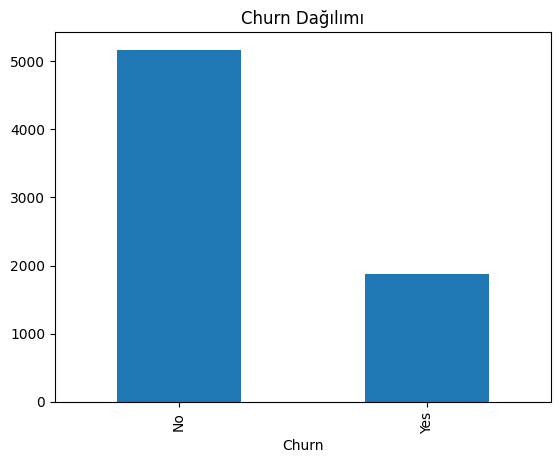

In [12]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Dağılımı")
plt.show()

Tenure (müşteri süresi) değişkenini segmentlere böldüm.


In [13]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, df['tenure'].max()],
    labels=['0-1 yıl', '1-2 yıl', '2-4 yıl', '4+ yıl'],
    include_lowest=True
)

In [14]:
df[['tenure', 'tenure_group']].head(10)

,tenure,tenure_group
0,1,0-1 yıl
1,34,2-4 yıl
2,2,0-1 yıl
3,45,2-4 yıl
4,2,0-1 yıl
5,8,0-1 yıl
6,22,1-2 yıl
7,10,0-1 yıl
8,28,2-4 yıl
9,62,4+ yıl


In [15]:
pd.crosstab(
    df['tenure_group'],
    df['Churn'],
    normalize='index'
) * 100

Churn,No,Yes
tenure_group,,
0-1 yıl,52.561757,47.438243
1-2 yıl,71.289062,28.710938
2-4 yıl,79.611041,20.388959
4+ yıl,90.486824,9.513176


Analiz sonucunda, 0–1 yıl aralığındaki müşterilerde churn oranının diğer gruplara kıyasla daha yüksek olduğu görülmekte.
Müşteri süresi arttıkça churn oranının azaldığı gözlemlenmektedir.

In [17]:
pd.crosstab(
    [df['tenure_group'], df['Contract']],
    df['Churn'],
    normalize='index'
) * 100

Churn                                No        Yes
tenure_group Contract                             
0-1 yıl      Month-to-month   48.645938  51.354062
             One year         89.516129  10.483871
             Two year        100.000000   0.000000
1-2 yıl      Month-to-month   62.279512  37.720488
             One year         91.878173   8.121827
             Two year        100.000000   0.000000
2-4 yıl      Month-to-month   67.082294  32.917706
             One year         89.382239  10.617761
             Two year         97.810219   2.189781
4+ yıl       Month-to-month   73.976608  26.023392
             One year         87.066246  12.933754
             Two year         96.674584   3.325416

Fiber optic internet kullanan müşterilerde churn oranının diğer hizmet türlerine göre daha yüksek olduğu gözlemlendi.
Bu durum, fiber internet müşterilerinin daha riskli bir segment olabileceğine işaret etmektedir.

In [18]:
internet_churn = pd.crosstab(
    df['InternetService'],
    df['Churn'],
    normalize='index'
) * 100

internet_churn

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


Fiber optic kullanan müşteriler arasında, teknik destek almayan kullanıcıların churn oranının daha yüksek olduğu görülmektedir.
Bu sonuç, teknik destek hizmetinin churn azaltan bir faktör olabileceğini göstermektedir.

In [19]:
fiber_df = df[df['InternetService'] == 'Fiber optic']

fiber_tech_churn = pd.crosstab(
    fiber_df['TechSupport'],
    fiber_df['Churn'],
    normalize='index'
) * 100

fiber_tech_churn

Churn,No,Yes
TechSupport,,
No,50.627803,49.372197
Yes,77.367206,22.632794


Churn Risk Profili

Analiz sonucunda, Fiber optic kullanan, teknik destek almayan, aylık sözleşmeye sahip ve müşteri süresi 1 yıldan kısa olan kullanıcıların churn oranının oldukça yüksek olduğu görülüyor.
Bu profil, öncelikli aksiyon alınması gereken yüksek riskli müşteri grubunu oluşturmaktadır.

In [20]:
high_risk = df[
    (df['InternetService'] == 'Fiber optic') &
    (df['TechSupport'] == 'No') &
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] <= 12)
]

high_risk['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
Yes,71.068427
No,28.931573


Modelleme aşamasında, churn ile anlamlı ilişki gösterdiğini gözlemlediğim değişkenleri seçtim.

In [38]:
df_model = df[['tenure', 'MonthlyCharges', 'Contract', 'TechSupport', 'Churn']]
df_model.head()

,tenure,MonthlyCharges,Contract,TechSupport,Churn
0,1,29.85,Month-to-month,No,No
1,34,56.95,One year,No,No
2,2,53.85,Month-to-month,No,Yes
3,45,42.30,One year,Yes,No
4,2,70.70,Month-to-month,No,Yes


Kategorik değişkenler, binary göstergelere dönüştürdüm.
Özellikle aylık sözleşme ve teknik destek almama durumlarının churn üzerindeki etkisi modele açık şekilde yansıtıldı.

In [40]:
df_model['is_month_to_month'] = (df_model['Contract'] == 'Month-to-month').astype(int)

/tmp/ipython-input-4122761184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['is_month_to_month'] = (df_model['Contract'] == 'Month-to-month').astype(int)


In [41]:
df_model['no_tech_support'] = (df_model['TechSupport'] == 'No').astype(int)

/tmp/ipython-input-3111895486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['no_tech_support'] = (df_model['TechSupport'] == 'No').astype(int)


In [42]:
df_model = df_model.drop(['Contract', 'TechSupport'], axis=1)

Churn değişkeni modelleme için ikili formata dönüştürüldü.

In [43]:
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})
df_model.head()

,tenure,MonthlyCharges,Churn,is_month_to_month,no_tech_support
0,1,29.85,0,1,1
1,34,56.95,0,0,1
2,2,53.85,1,1,1
3,45,42.30,0,0,0
4,2,70.70,1,1,1


In [44]:
X = df_model[['tenure', 'MonthlyCharges', 'is_month_to_month', 'no_tech_support']]
y = df_model['Churn']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Sayısal değişkenler farklı ölçeklerde olduğu için standardizasyon uygulandı.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Churn tahmini için, yorumlanabilirliği yüksek ve iş kararlarını destekleyen Logistic Regression modelini tercih ettim.

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test)

Lojistik regresyon modeli %80 doğruluk ve 0.85 ROC AUC skoru gösterdi. Model, churn eden müşterilerin %53’ünü doğru tespit edebilmiş ve churn olarak tahmin edilen müşterilerin %64’ü gerçekten churn etmiştir. Confusion matrix sonuçları, churn olmayan müşterilerin büyük ölçüde doğru sınıflandırıldığını ve churn riski taşıyan müşteri grubunun başarıyla yakalandığını göstermektedir. Bu sonuçlar, modelin müşteri kaybını önlemeye yönelik erken aksiyon alınabilecek riskli müşteri gruplarını belirlemede kullanılabilir olduğunu göstermektedir.

In [57]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC: 0.8527021851418635
Confusion Matrix:
 [[925 111]
 [174 199]]


Lojistik regresyon modeli kullanılarak her müşteri için churn olasılığı hesaplanmıştır. Bu olasılık değeri, müşterilerin risk seviyelerini belirlemek amacıyla yapıldı.

In [53]:
df['churn_probability'] = model.predict_proba(X)[:, 1]
df[['customerID', 'churn_probability']].head()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,customerID,churn_probability
0,7590-VHVEG,1.000000
1,5575-GNVDE,0.999995
2,3668-QPYBK,1.000000
3,7795-CFOCW,0.000264
4,9237-HQITU,1.000000


Churn olasılığına göre müşterileri gruplara ayırmak için risk segmentleri tanımlandı.

In [59]:
def risk_group(p):
    if p >= 0.6:
        return 'High Risk'
    elif p >= 0.3:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['risk_segment'] = df['churn_probability'].apply(risk_group)
df['risk_segment'].value_counts(normalize=True) * 100

,proportion
risk_segment,
High Risk,77.836149
Low Risk,20.885986
Medium Risk,1.277865


Risk skorları ve segment bilgileri eklenmiş veri seti, Power BI üzerinde görselleştirme ve dashboard oluşturmak amacıyla dışa aktarıldı.


In [58]:
df['risk_segment'] = pd.cut(
    df['churn_probability'],
    bins=[0, 0.3, 0.6, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

df.to_csv("telco_churn_with_risk.csv", index=False)